<a href="https://colab.research.google.com/github/indra622/AIAcademy_SpeechRecognition/blob/main/1_Torchaudio%EB%A5%BC_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EC%9D%8C%EC%95%85%ED%8C%8C%EC%9D%BC_%EB%8B%A4%EB%A3%A8%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Torchaudio를 이용한 음악파일 다루기


In [ ]:
import torchaudio
import pandas as pd
import torch
import matplotlib.pyplot as plt
import torchaudio.transforms as T
import torch.nn.functional as F
import IPython.display as ipd
from pathlib import Path

## free-spoken-digit-dataset

음성 버전의 MNIST dataset

https://github.com/Jakobovski/free-spoken-digit-dataset

<img src="https://drive.google.com/uc?id=1yEjXMS5-KTrYriyPhrSaJqeneBTStao_">

### Current status
- 6 speakers
- 3,000 recordings (50 of each digit per speaker)
- English pronunciations
### Organization
Files are named in the following format: `{digitLabel}_{speakerName}_{index}.wav` Example: 7_jackson_32.wav

### Usage
The test set officially consists of the first 10% of the recordings. Recordings numbered 0-4 (inclusive) are in the test and 5-49 are in the training set.



In [ ]:
!git clone https://github.com/Jakobovski/free-spoken-digit-dataset

Cloning into 'free-spoken-digit-dataset'...
remote: Enumerating objects: 4237, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 4237 (delta 12), reused 8 (delta 8), pack-reused 4212
Receiving objects: 100% (4237/4237), 30.37 MiB | 30.76 MiB/s, done.
Resolving deltas: 100% (116/116), done.


In [ ]:
!ls

free-spoken-digit-dataset  sample_data


In [ ]:
!ls free-spoken-digit-dataset

acquire_data  metadata.py	    README.md	upload_to_hub.py
__init__.py   pip_requirements.txt  recordings	utils


```
acquire_data  metadata.py	    README.md	upload_to_hub.py
__init__.py   pip_requirements.txt  recordings	utils
```

`recodingds` : 디렉토리에 음성 파일들이 위치

In [ ]:
audio_dir = Path("./free-spoken-digit-dataset/recordings")
audios = list(audio_dir.rglob("*.wav"))


audio파일들의 Path를 확인

In [ ]:
audios[:10]

[PosixPath('free-spoken-digit-dataset/recordings/2_george_4.wav'),
 PosixPath('free-spoken-digit-dataset/recordings/4_yweweler_44.wav'),
 PosixPath('free-spoken-digit-dataset/recordings/0_theo_49.wav'),
 PosixPath('free-spoken-digit-dataset/recordings/5_lucas_29.wav'),
 PosixPath('free-spoken-digit-dataset/recordings/2_lucas_3.wav'),
 PosixPath('free-spoken-digit-dataset/recordings/0_jackson_46.wav'),
 PosixPath('free-spoken-digit-dataset/recordings/9_yweweler_9.wav'),
 PosixPath('free-spoken-digit-dataset/recordings/6_nicolas_15.wav'),
 PosixPath('free-spoken-digit-dataset/recordings/2_lucas_35.wav'),
 PosixPath('free-spoken-digit-dataset/recordings/5_yweweler_10.wav')]

## `ipd.Audio`를 이용한 `wav`파일 들어보기

```
??ipd.Audio
```

In [ ]:
idx = 5
print(audios[idx])
ipd.Audio(str(audios[idx]))

free-spoken-digit-dataset/recordings/0_jackson_46.wav


## torchaudio를 이용하여 음악파일 불러오기
### Loading audio data
To load audio data, you can use `torchaudio.load()`.

This function accepts a path-like object or file-like object as input.

The returned value is a tuple of waveform (`Tensor`) and sample rate (`int`).

By default, the resulting tensor object has `dtype=torch.float32` and its value range is` [-1.0, 1.0]`.

For the list of supported format, please refer to the torchaudio documentation.
```
waveform, sample_rate = torchaudio.load(SAMPLE_WAV)
```

In [ ]:
print(audios[1])
y,sr = torchaudio.load(audios[1])

free-spoken-digit-dataset/recordings/4_yweweler_44.wav


In [ ]:
print(type(y))

<class 'torch.Tensor'>


In [ ]:
y.shape, sr

(torch.Size([1, 2911]), 8000)

마찬가지로 `ipd.Audio`를 이용해서도 `torch.Tensor`타입의 변수를 읽고 들을 수 있음.

In [ ]:
ipd.Audio(y, rate=sr)

## torch.Tensor타입의 Waveform의 시각화 
`matplotlib.pyplot` 을 이용하여 audio sample을 시각화 가능

python의 `Slicing`을 통해 특정구간을 확대하여 확인 가능


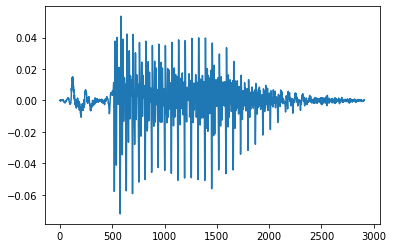

In [ ]:
plt.plot(y[0])

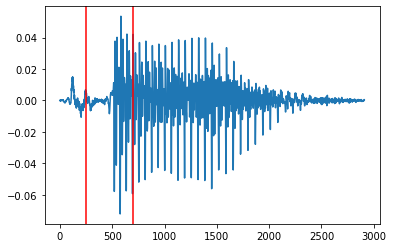

In [ ]:
start,end = 250,700
plt.plot(y[0])
plt.axvline(start,color='r')
plt.axvline(end,color='r')

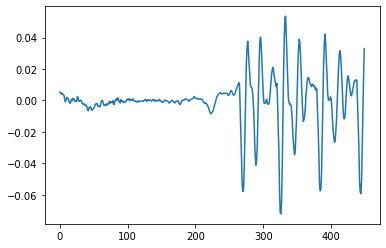

In [ ]:
plt.plot(y[0][start:end])

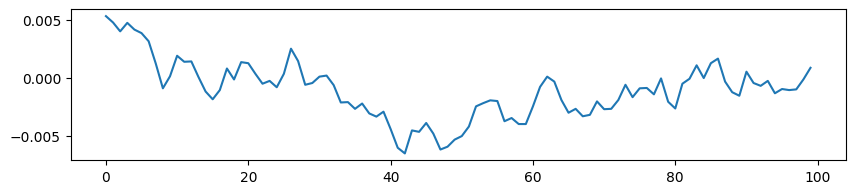

In [ ]:
start,dur = 250,100
#plt.bar(range(dur),y[0][start:start+dur])
plt.figure(figsize=(10,2),dpi=100)
plt.plot(range(dur),y[0][start:start+dur])
plt.show()

### `matplotlib.pyplot.stem` 을 이용하여 sample확인
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.stem.html
```python
??matplotlib.pyplot.stem
```

<StemContainer object of 3 artists>

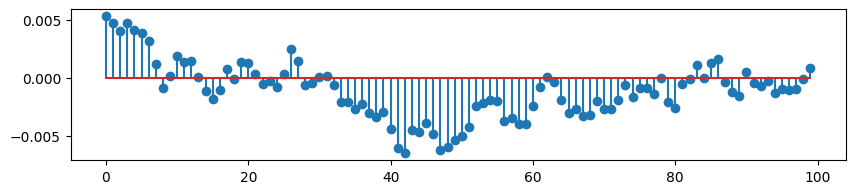

In [ ]:
plt.figure(figsize=(10,2),dpi=100)
plt.stem(range(dur),y[0][start:start+dur], use_line_collection=True)

plot과 함께 그리기

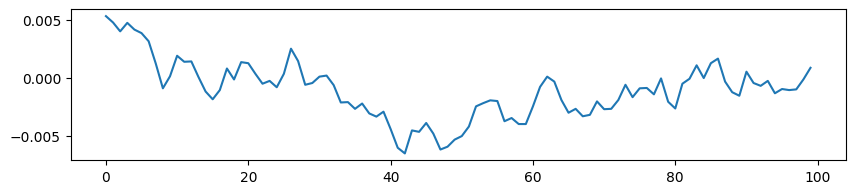

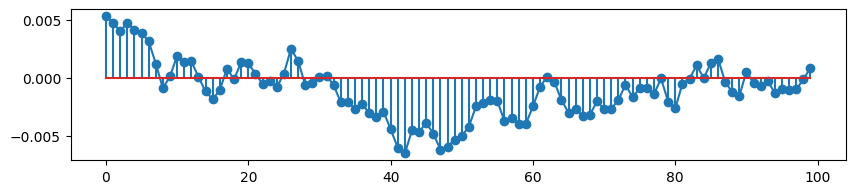

In [ ]:
#plt.bar(range(dur),y[0][start:start+dur])
plt.figure(figsize=(10,2),dpi=100)
plt.plot(range(dur),y[0][start:start+dur])
plt.show()
plt.figure(figsize=(10,2),dpi=100)
plt.plot(range(dur),y[0][start:start+dur])
plt.stem(range(dur),y[0][start:start+dur], use_line_collection=True)
plt.show()

## Audio feature extraction 
### Overview of audio features

<img src="https://download.pytorch.org/torchaudio/tutorial-assets/torchaudio_feature_extractions.png" width=600>



frequncy Domain

STFT (DFT)

<img src="https://upload.wikimedia.org/wikipedia/commons/6/61/FFT-Time-Frequency-View.png?20171130134719" width=600>

### Raw Spectrogram 
`torchaudio.transforms.Spectrogram` class를 이용
```python
n_fft = 1024
win_length = None
hop_length = 512

# Define transform
spectrogram = T.Spectrogram(
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
)
```

In [ ]:
??T.Spectrogram

free-spoken-digit-dataset/recordings/4_yweweler_44.wav
torch.Size([1, 2911])


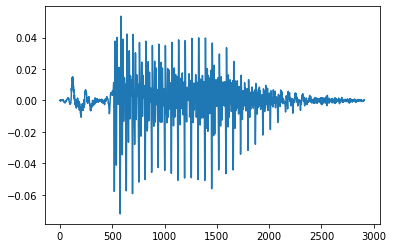

In [ ]:
print(audios[1])
y,sr = torchaudio.load(audios[1])
print(y.shape)
plt.plot(y[0])


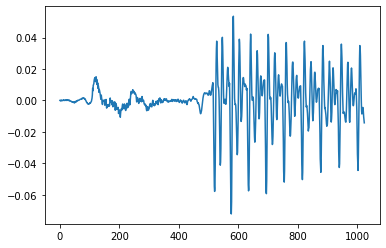

In [ ]:
plt.plot(y[0][0:1024])

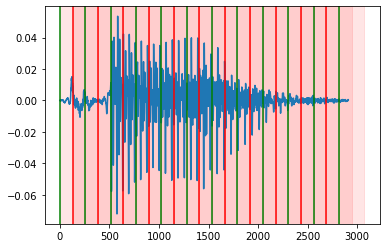

In [ ]:
n_fft=256
win_length = n_fft
hop_length=win_length//2
start,dur = 0,2911
plt.plot(y[0][start:start+dur])
i=0
for x in range(start,dur,hop_length):
  i+=1  
  c='r' if i%2==0 else 'g'
  plt.axvline(x,color=c)
  plt.axvspan(x,x+win_length,color='r',alpha=0.1)


In [ ]:
spec_converter = T.Spectrogram(n_fft=n_fft,win_length=win_length,hop_length=hop_length)
spec = spec_converter(y)

In [ ]:
spec.shape

torch.Size([1, 129, 23])

In [ ]:
print(len(y[0]))
print(len(y[0])//hop_length+1)

2911
23


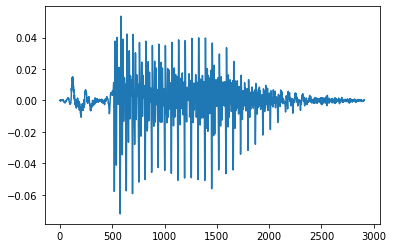

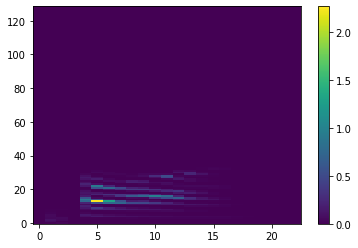

In [ ]:
plt.plot(y[0])
plt.show()
plt.imshow(spec[0],origin="below",aspect='auto',interpolation='nearest')
plt.colorbar()

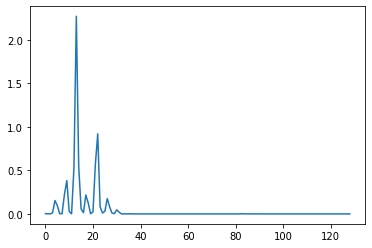

In [ ]:
plt.plot(spec[0,:,5])

### AmplitudeToDB
Turn a tensor from the power/amplitude scale to the decibel scale.

`torchaudio.transforms.AmplitudeToDB(stype: str = 'power', top_db: Optional[float] = None)`
  

In [ ]:
db_converter = T.AmplitudeToDB()

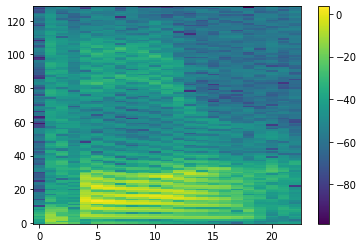

In [ ]:
db_spec = db_converter(spec)
plt.imshow(db_spec[0],origin='lower',aspect='auto',interpolation='nearest')
plt.colorbar()

In [ ]:
spec.shape

torch.Size([1, 129, 23])

### Mel-Spectrogram
참고 : https://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html

In [ ]:
mel_scale = T.MelScale(n_mels=64,sample_rate=8000,f_min=20,f_max=4000,n_stft=129)

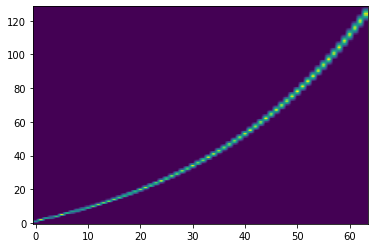

In [ ]:
plt.imshow(mel_scale.fb,aspect='auto',origin='lower')

In [ ]:
fb = torchaudio.functional.melscale_fbanks(n_freqs=129,f_min=20,f_max=4000,n_mels=10,sample_rate=8000)
fb.shape

torch.Size([129, 10])

In [ ]:
 plt.show()

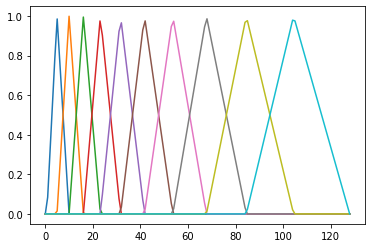

In [ ]:

for e,bin in enumerate(fb.T) :
  plt.plot(bin)
plt.show()

In [ ]:
mel_converter = T.MelSpectrogram(sample_rate=8000,n_mels=64,n_fft=256,hop_length=n_fft//2)

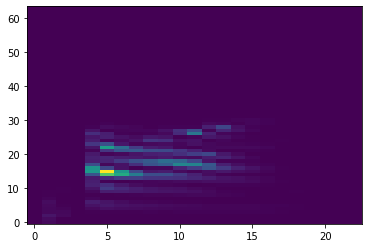

In [ ]:
mel_spec = mel_converter(y)
plt.imshow(mel_spec[0],aspect='auto',interpolation='nearest',origin='lower')

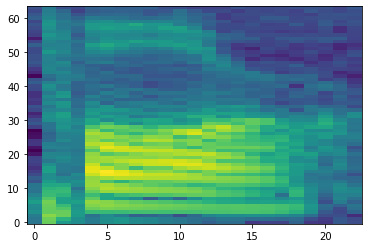

In [ ]:
mel_spec = db_converter(mel_spec)
plt.imshow(mel_spec[0],aspect='auto',interpolation='nearest',origin='lower')

# MFCC
```python
CLASS torchaudio.transforms.MFCC(
        sample_rate: int = 16000, 
        n_mfcc: int = 40, 
        dct_type: int = 2, 
        norm: str = 'ortho', 
        log_mels: bool = False, 
        melkwargs: Optional[dict] = None)
```

In [ ]:
melkwargs={
        "n_fft":256,
        "n_mels": 64,
        "hop_length": 256//2,
        "mel_scale": "htk",
    }
mfcc_converter = T.MFCC(sample_rate=8000,n_mfcc=40,melkwargs=melkwargs)

In [ ]:
mfcc = mfcc_converter(y)
mfcc.shape

torch.Size([1, 40, 23])

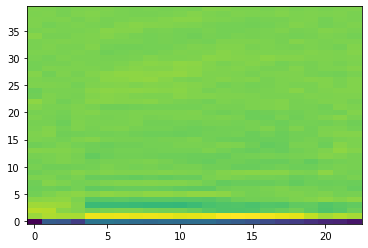

In [ ]:
#mfcc = db_converter(mfcc)
plt.imshow(mfcc[0],origin='lower',aspect='auto',interpolation='nearest')